In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc


def create_multiple_ROC(folder_path):
    """
    Given a folder path, this function reads all CSV files starting with 'roc_data_' 
    and containing fpr and tpr, then plots ROC curves for each model with AUC values.

    Args:
    folder_path (str): Path to the folder containing the ROC CSV files.

    Returns:
    None: Plots a combined ROC curve for all models.
    """
    plt.figure(figsize=(8, 6))
    d = {'FairClip_resnet50_text_DMGI_cont_loss':0.766,
        'FairClip_resnet50_text_DMGI':0.767,
        'FairClip_resnet50_categ_DMGI':0.520}

    # List all files in the folder that start with "roc_data_"
    for file_name in os.listdir(folder_path):
        if file_name.startswith("roc_data_") and file_name.endswith(".csv"):
            # Full path to the CSV file
            file_path = os.path.join(folder_path, file_name)

            # Extract model name from the file name (assuming the format is "roc_data_{model_name}.csv")
            model_name = file_name.replace('roc_data_', '').replace('.csv', '')

            # Read the CSV file
            data = pd.read_csv(file_path)

            # Ensure the CSV has the correct columns
            if 'fpr' not in data.columns or 'tpr' not in data.columns:
                print(f"File {file_path} does not contain the correct 'fpr' and 'tpr' columns.")
                continue

            # Calculate the AUC
            roc_auc = auc(data['fpr'], data['tpr'])
            

            # Plot the ROC curve for this model
            plt.plot(data['fpr'], data['tpr'], label=f'{model_name} (AUC = {roc_auc:.3f})')

    # Plot the random guess line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Plot settings
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.savefig('MultiplexNetwork/saved_ROC/comparative_roc_curve.png', facecolor='white')

def plot_training_losses(folder_path):
    """
    Given a folder path, this function reads all CSV files starting with 'train_losses_' 
    and containing loss values, then plots the training loss curves for each model.
    The x-axis will adjust to fit the maximum number of epochs found in the data.

    Args:
    folder_path (str): Path to the folder containing the training loss CSV files.

    Returns:
    None: Plots a combined figure with loss curves for all models.
    """
    plt.figure(figsize=(8, 6))
    max_epochs = 0  # Keep track of the maximum number of epochs
    
    # Dictionary to store data for each model
    model_losses = {}

    # List all files in the folder that start with "train_losses_"
    for file_name in os.listdir(folder_path):
        if file_name.startswith("train_losses_") and file_name.endswith(".csv"):
            # Full path to the CSV file
            file_path = os.path.join(folder_path, file_name)

            # Extract model name from the file name (assuming the format is "train_losses_{model_name}.csv")
            model_name = file_name.replace('train_losses_', '').replace('.csv', '')

            # Read the CSV file
            data = pd.read_csv(file_path)

            # Ensure the CSV has a 'loss' column
            if 'train_loss' not in data.columns:
                print(f"File {file_path} does not contain the 'train_loss' column.")
                continue

            # Store the model's loss values and the number of epochs
            model_losses[model_name] = data['train_loss'].values

            # Update max_epochs to the longest training duration found
            max_epochs = max(max_epochs, len(data))

    # Plot the loss curves
    for model_name, losses in model_losses.items():
        epochs = range(1, len(losses) + 1)  # Create epoch range for this model
        plt.plot(epochs, losses, label=model_name)

    # Plot settings
    plt.xlim([1, max_epochs])
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss Curves for Different Models')
    plt.legend(loc="upper right")
    plt.savefig('MultiplexNetwork/saved_ROC/comparative_loss_curve.png',facecolor='white')



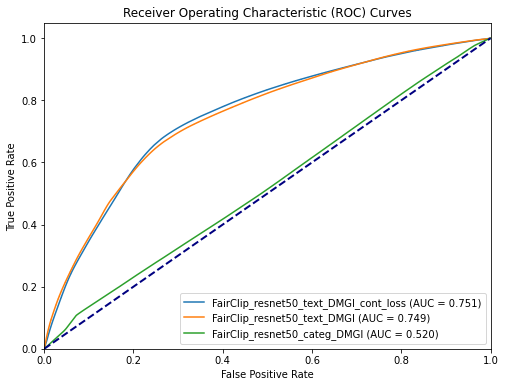

In [8]:
folder_path = '/Multimodal-Medical/MultiplexNetwork/saved_ROC'
# plot_training_losses(folder_path)
create_multiple_ROC(folder_path)